In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson, norm, lognorm, weibull_min, levy
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [10]:
data = pd.read_csv('tokens.txt')
data.head()

tokens
0      25
1      31
2      36
3      33
4      41

In [11]:

# Convert the dataset to a NumPy array for better handling
data = np.array(data.tokens)

# We need to create histogram data to fit
values, base = np.histogram(data, bins=20, density=True)

# Calculate mid points for bins
x_data = base[:-1] + np.diff(base) / 2

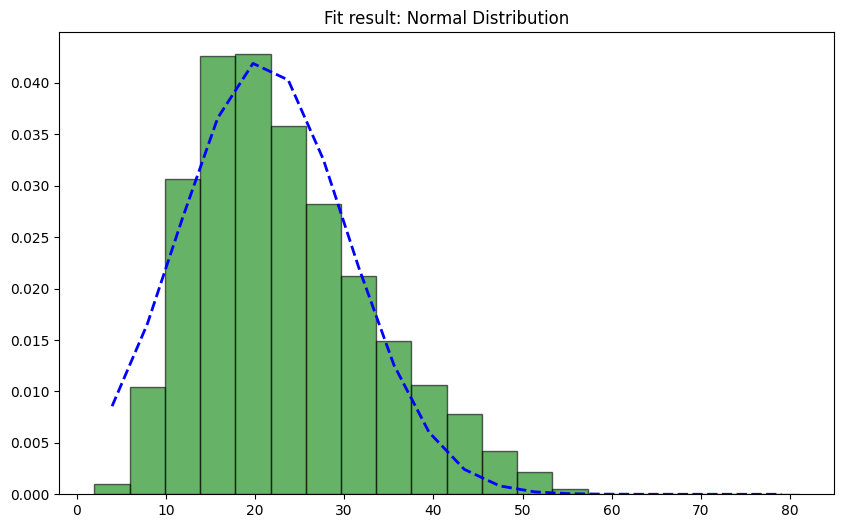

In [14]:
def fit_normal(x, mean, std):
    return norm.pdf(x, mean, std)

params_norm, _ = curve_fit(fit_normal, x_data, values, p0=[np.mean(data), np.std(data)])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', ec='black')
plt.plot(x_data, fit_normal(x_data, *params_norm), 'b--', linewidth=2)
plt.title("Fit result: Normal Distribution")
plt.show()


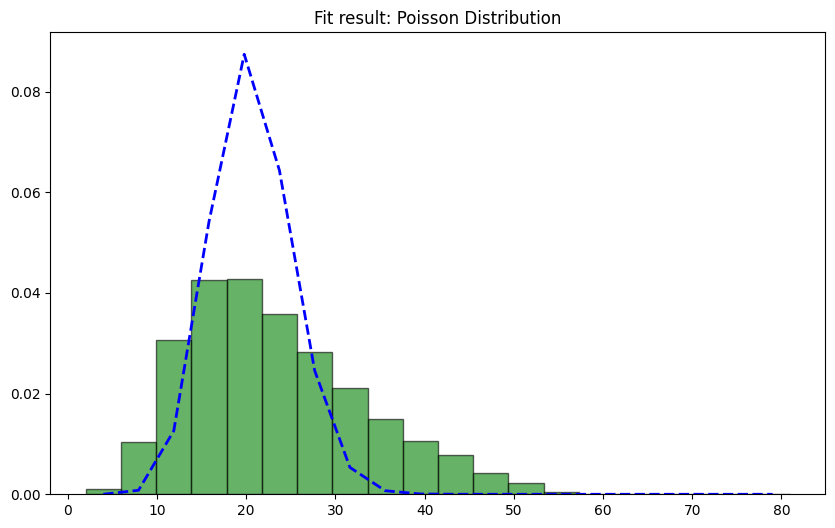

In [17]:
def fit_poisson(x, mu):
    # Because Poisson is a PMF and expects integers, we use the round function
    return poisson.pmf(np.round(x), mu)

params_poisson, _ = curve_fit(fit_poisson, x_data, values, p0=[np.mean(data)])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', ec='black')
plt.plot(x_data, fit_poisson(x_data, *params_poisson), 'b--', linewidth=2)
plt.title("Fit result: Poisson Distribution")
plt.show()


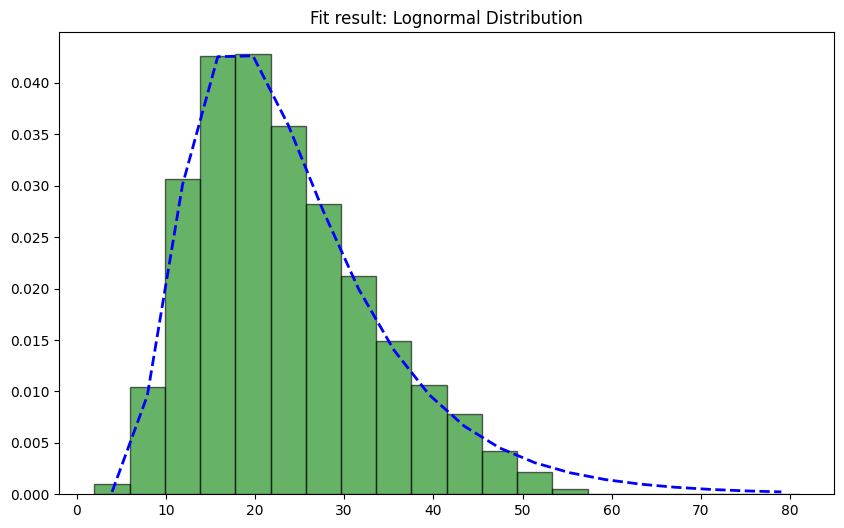

In [20]:
def fit_lognormal(x, mu, sigma):
    return lognorm.pdf(x, sigma, scale=np.exp(mu))

params_lognorm, _ = curve_fit(fit_lognormal, x_data, values, p0=[np.mean(np.log(data)), np.std(np.log(data))])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', ec='black')
plt.plot(x_data, fit_lognormal(x_data, *params_lognorm), 'b--', linewidth=2)
plt.title("Fit result: Lognormal Distribution")
plt.show()


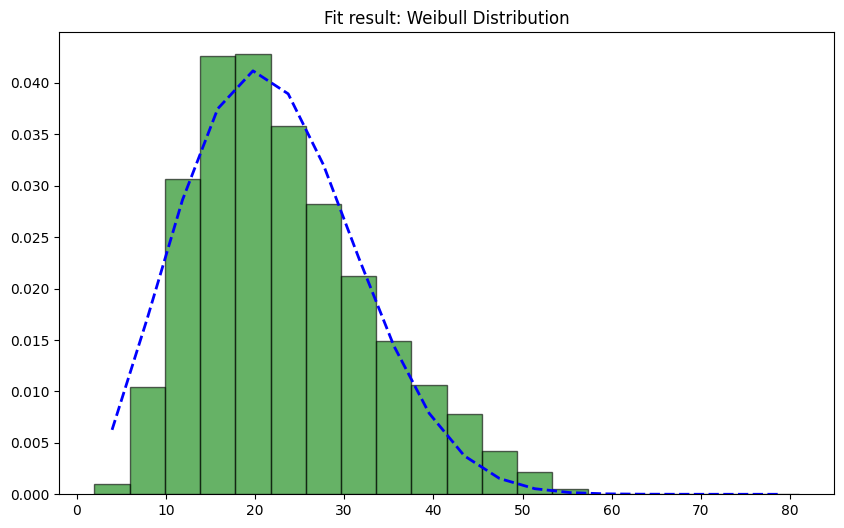

In [21]:
def fit_weibull(x, k, lam):
    return weibull_min.pdf(x, k, scale=lam)

params_weibull, _ = curve_fit(fit_weibull, x_data, values, p0=[1.5, np.mean(data)])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', ec='black')
plt.plot(x_data, fit_weibull(x_data, *params_weibull), 'b--', linewidth=2)
plt.title("Fit result: Weibull Distribution")
plt.show()


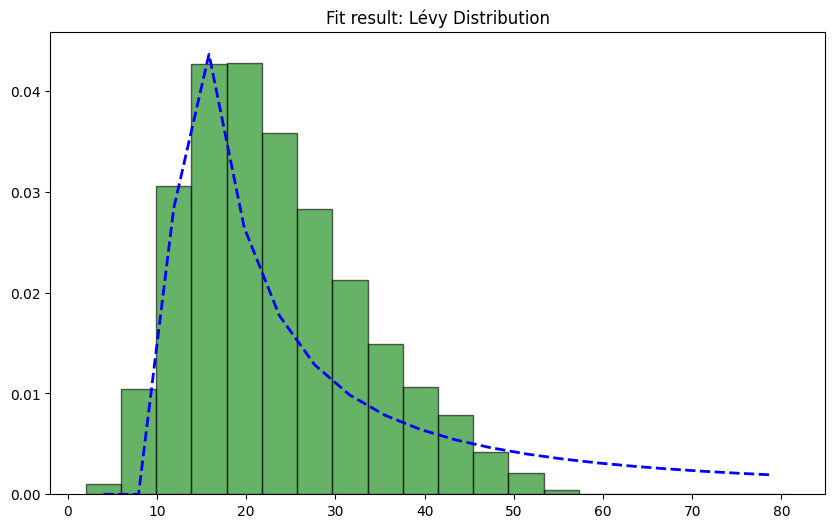

In [22]:
def fit_levy(x, mu, c):
    return levy.pdf(x, loc=mu, scale=c)

params_levy, _ = curve_fit(fit_levy, x_data, values, p0=[np.min(data), 3])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', ec='black')
plt.plot(x_data, fit_levy(x_data, *params_levy), 'b--', linewidth=2)
plt.title("Fit result: Lévy Distribution")
plt.show()

In [23]:
# Assuming we have the fitted parameters from the previous sections
# Also assuming the function definitions and imports are already in place

# Import necessary library for calculating MSE
from sklearn.metrics import mean_squared_error

# Evaluate each PDF at the bin centers and compute MSE
normal_pdf_values = fit_normal(x_data, *params_norm)
poisson_pdf_values = fit_poisson(x_data, *params_poisson)
lognormal_pdf_values = fit_lognormal(x_data, *params_lognorm)
weibull_pdf_values = fit_weibull(x_data, *params_weibull)
levy_pdf_values = fit_levy(x_data, *params_levy)

# Calculate MSE for each fitted distribution
mse_normal = mean_squared_error(values, normal_pdf_values)
mse_poisson = mean_squared_error(values, poisson_pdf_values)
mse_lognormal = mean_squared_error(values, lognormal_pdf_values)
mse_weibull = mean_squared_error(values, weibull_pdf_values)
mse_levy = mean_squared_error(values, levy_pdf_values)

# Printing MSE for each distribution
print(f"MSE - Normal Distribution: {mse_normal}")
print(f"MSE - Poisson Distribution: {mse_poisson}")
print(f"MSE - Lognormal Distribution: {mse_lognormal}")
print(f"MSE - Weibull Distribution: {mse_weibull}")
print(f"MSE - Lévy Distribution: {mse_levy}")


MSE - Normal Distribution: 1.2791483349429298e-05
MSE - Poisson Distribution: 0.00020105453762331196
MSE - Lognormal Distribution: 7.098111725025554e-07
MSE - Weibull Distribution: 8.317194676894815e-06
MSE - Lévy Distribution: 6.002745901618657e-05
